In [5]:
#import arff
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19

1. DATA ACQUIRE FOR VISEGAURD DATASET
2. DATA PRE PROCESS
3. DATA REPRESENTATION WITH LABELS
4. DATA MODELLING WITH EXISITNG ALGORITHMS


## DATA ACQUIRE FOR VISEGAURD DATASET

In [21]:
data = pd.read_csv('single_file.csv')

In [22]:
data

Num   Country     X1     X2      X3    X4      X5     X6     X7    X8  \
0     10.0   Hungary      m      m       m     m       m      m      m     m   
1     22.0    Poland  -0.01   0.59   -0.05  0.74    0.01  -0.01   0.71  0.14   
2     27.0   Hungary      m      m       m     m       m      m      m     m   
3     73.0    Poland      0   0.67    0.07  1.13    0.12      0   0.49  0.34   
4     74.0    Poland   0.06   1.05   -0.28  0.48       0   0.08  -0.04  0.28   
..     ...       ...    ...    ...     ...   ...     ...    ...    ...   ...   
445  404.0  Slovakia      m      m       m     m       m      m      m     m   
446  423.0    Poland  -0.15  29.05  -27.13  0.07  -36.58  -0.21  -0.96     0   
447  427.0  Slovakia      m      m       m     m       m      m      m     m   
448  432.0    Poland      0      0       0     0       0      0      0     0   
449  438.0  Slovakia      m      m       m     m       m      m      m     m   

     ...   X74   X75    X76    X77   X78   X79   X80      X81    X82    S  
0    ...     m     m      m      m     m     m     m        m      m  1.0  
1    ...  0.93  0.82   1.73   0.18  1.01  0.99  0.95  3824933   3.03  1.0  
2    ...     m     m      m      m     m     m     m        m      m  1.0  
3    ...  0.84  0.79  -0.05  -0.56  1.26  0.77  0.79        0  -1.53  1.0  
4    ...   0.9   1.4  -0.46  -0.77  0.98  1.53   0.8    -1.17   0.19  1.0  
..   ...   ...   ...    ...    ...   ...   ...   ...      ...    ...  ...  
445  ...     0     0      m      m     m     0     0        m      m  6.0  
446  ...     m     m      m      m     m     m     m        m      m  6.0  
447  ...     0     0      m      m     m     0     0        m      m  6.0  
448  ...     0     0      0      0     0     0     0        0      0  6.0  
449  ...     m     m      m      m     m     m     m        m      m  6.0  

[450 rows x 85 columns]

## PREPROCESSING

In [23]:
def preprocess_data(df):
    # Drop rows with missing values
    df.dropna(inplace=True)
    
    # Encode categorical variables using LabelEncoder
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Impute missing values for numerical variables
    imputer = SimpleImputer(strategy='mean')
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
    
    
    
    return df

In [24]:
df1 = preprocess_data(data)
df1

Num  Country    X1     X2     X3     X4     X5    X6     X7    X8  ...  \
0     10.0      1.0  32.0  116.0  124.0  214.0  136.0  32.0  218.0  76.0  ...   
1     22.0      2.0   0.0   54.0    4.0   33.0   79.0   0.0   74.0  14.0  ...   
2     27.0      1.0  32.0  116.0  124.0  214.0  136.0  32.0  218.0  76.0  ...   
3     73.0      2.0  15.0   62.0   56.0   65.0   90.0  15.0   57.0  34.0  ...   
4     74.0      2.0  21.0   92.0   22.0   20.0   78.0  23.0    1.0  28.0  ...   
..     ...      ...   ...    ...    ...    ...    ...   ...    ...   ...  ...   
445  404.0      3.0  32.0  116.0  124.0  214.0  136.0  32.0  218.0  76.0  ...   
446  423.0      2.0  10.0  112.0   47.0    4.0   70.0  10.0   21.0   0.0  ...   
447  427.0      3.0  32.0  116.0  124.0  214.0  136.0  32.0  218.0  76.0  ...   
448  432.0      2.0  15.0    0.0   49.0    0.0   78.0  15.0   22.0   0.0  ...   
449  438.0      3.0  32.0  116.0  124.0  214.0  136.0  32.0  218.0  76.0  ...   

      X74   X75    X76    X77   X78    X79    X80    X81    X82    S  
0    65.0  95.0  149.0  149.0  98.0  121.0  111.0  113.0  112.0  1.0  
1    23.0  27.0  111.0   44.0  44.0   48.0   40.0  105.0  103.0  1.0  
2    65.0  95.0  149.0  149.0  98.0  121.0  111.0  113.0  112.0  1.0  
3    15.0  24.0    2.0   15.0  68.0   28.0   24.0   58.0   48.0  1.0  
4    20.0  76.0   16.0   17.0  41.0   94.0   25.0   30.0   78.0  1.0  
..    ...   ...    ...    ...   ...    ...    ...    ...    ...  ...  
445   0.0   0.0  149.0  149.0  98.0    0.0    0.0  113.0  112.0  6.0  
446  65.0  95.0  149.0  149.0  98.0  121.0  111.0  113.0  112.0  6.0  
447   0.0   0.0  149.0  149.0  98.0    0.0    0.0  113.0  112.0  6.0  
448   0.0   0.0   26.0   32.0   0.0    0.0    0.0   58.0   68.0  6.0  
449  65.0  95.0  149.0  149.0  98.0  121.0  111.0  113.0  112.0  6.0  

[450 rows x 85 columns]

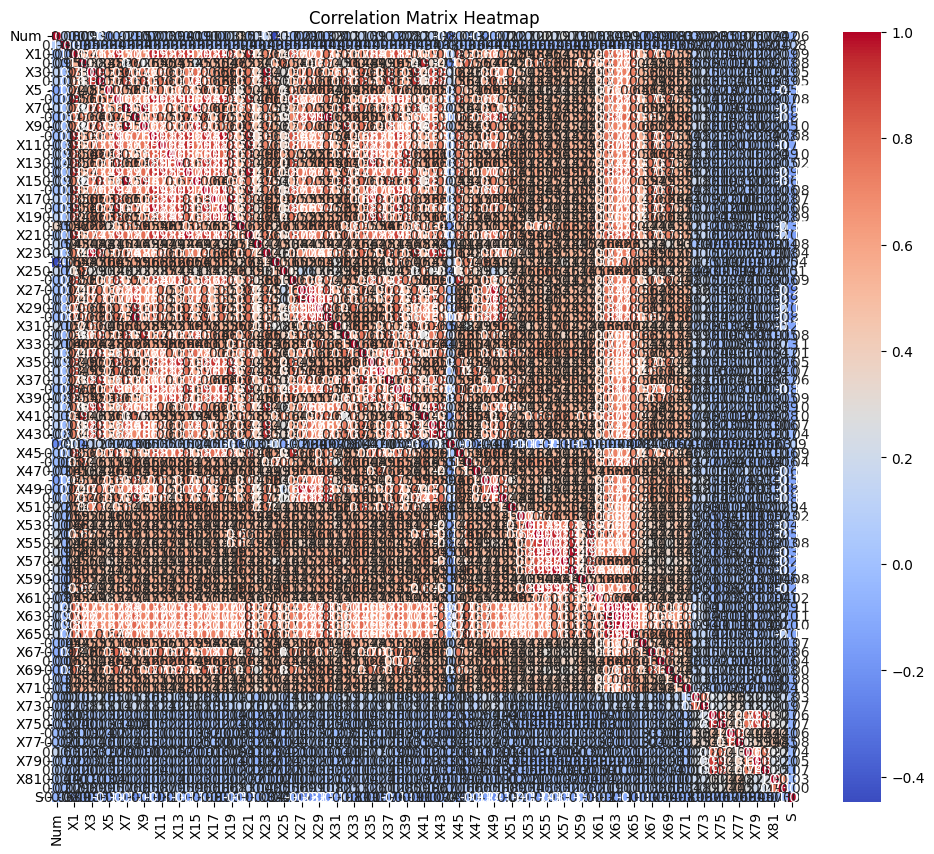

Feature Importances (Correlation with 'S'):
S      1.000000
X27    0.229469
X28    0.222279
X49    0.213128
X30    0.202567
         ...   
X61    0.017882
X34    0.014556
X25    0.012732
X69    0.002517
X82    0.002064
Name: S, Length: 85, dtype: float64


In [25]:
correlation_matrix = df1.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Assuming 'S' is your target variable column
# Sort features based on their correlation with 'S'
feature_correlation = correlation_matrix['S'].abs().sort_values(ascending=False)

# Print feature importances
print("Feature Importances (Correlation with 'S'):")
print(feature_correlation)

In [26]:
len(feature_correlation)

85

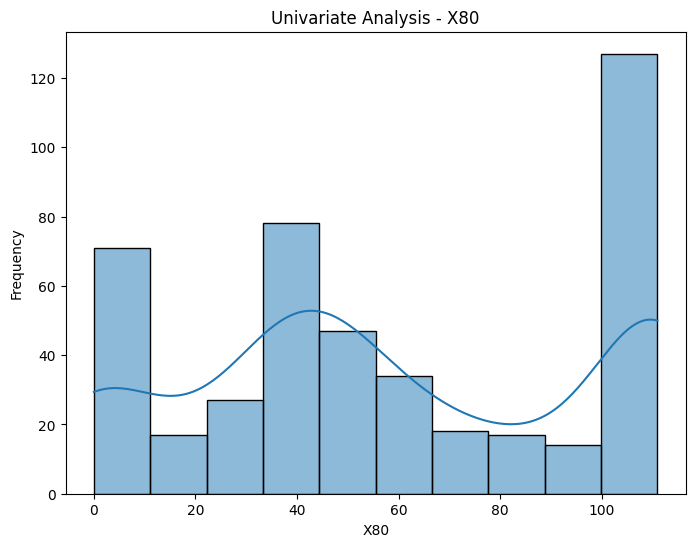

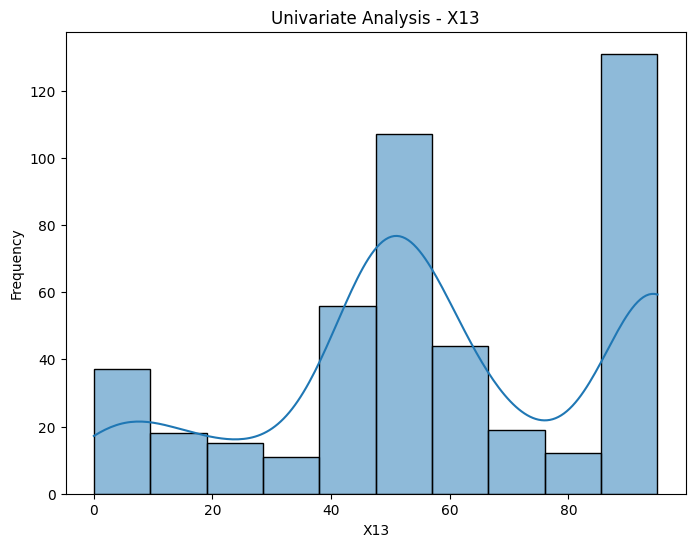

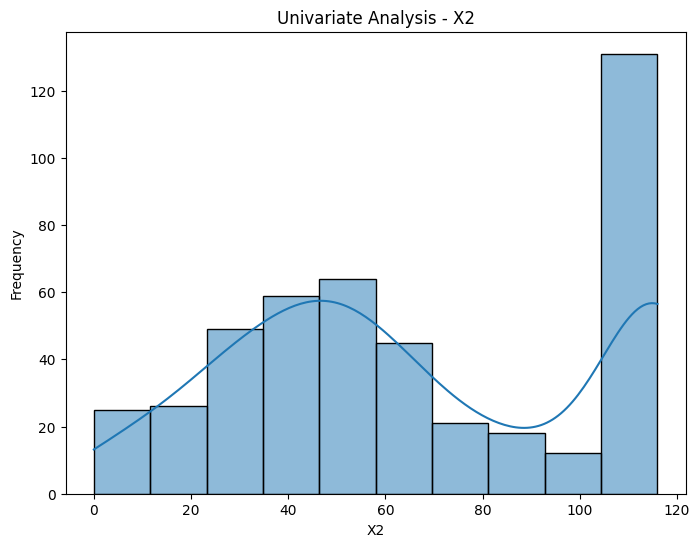

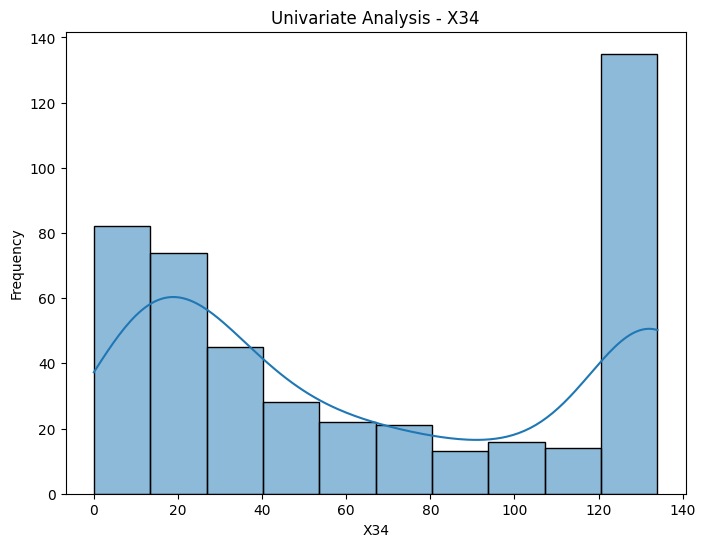

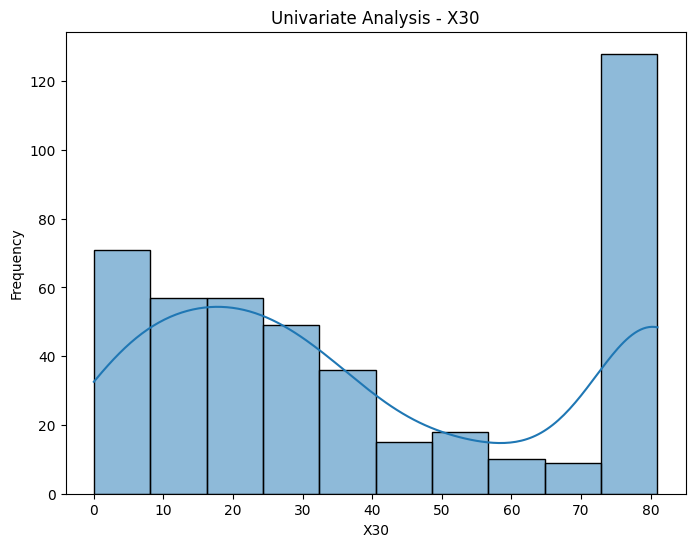

In [27]:
def univariate_analysis(df, num_columns):
    random.seed(42)  # Set seed for reproducibility
    all_columns = df.columns.tolist()
    columns_to_analyze = random.sample(all_columns, num_columns)

    for column in columns_to_analyze:
        plt.figure(figsize=(8, 6))
        if df[column].dtype == 'object':
            sns.countplot(data=df, x=column)
            plt.title(f'Univariate Analysis - {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        else:
            sns.histplot(df[column], kde=True)
            plt.title(f'Univariate Analysis - {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

def bivariate_analysis(df, num_columns):
    random.seed(42)  # Set seed for reproducibility
    all_columns = df.columns.tolist()
    columns_to_analyze = random.sample(all_columns, num_columns)

    for i, column1 in enumerate(columns_to_analyze):
        for j, column2 in enumerate(columns_to_analyze):
            if i < j:
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=df, x=column1, y=column2)
                plt.title(f'Bivariate Analysis - {column1} vs {column2}')
                plt.xlabel(column1)
                plt.ylabel(column2)
                plt.show()

def multivariate_analysis(df, num_columns):
    random.seed(42)  # Set seed for reproducibility
    all_columns = df.columns.tolist()
    columns_to_analyze = random.sample(all_columns, num_columns)

    sns.pairplot(df[columns_to_analyze])
    plt.title('Multivariate Analysis')
    plt.show()


univariate_analysis(df1, 5)


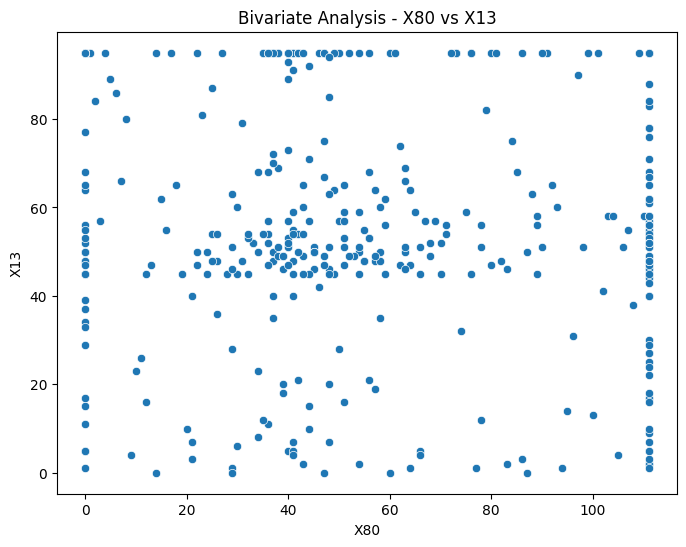

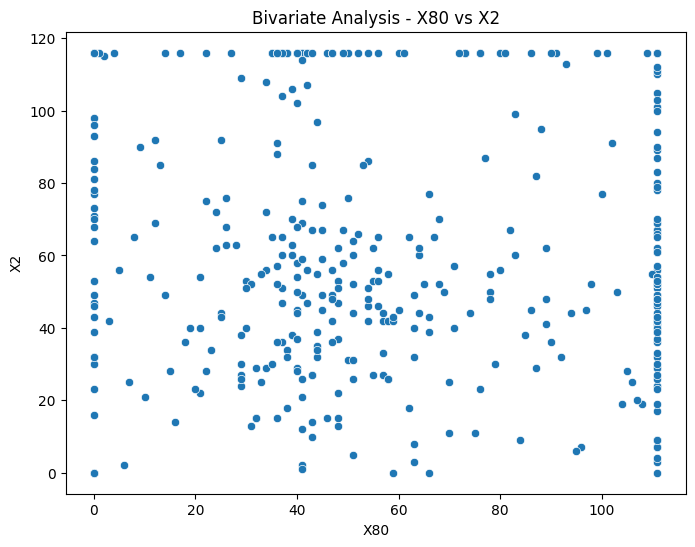

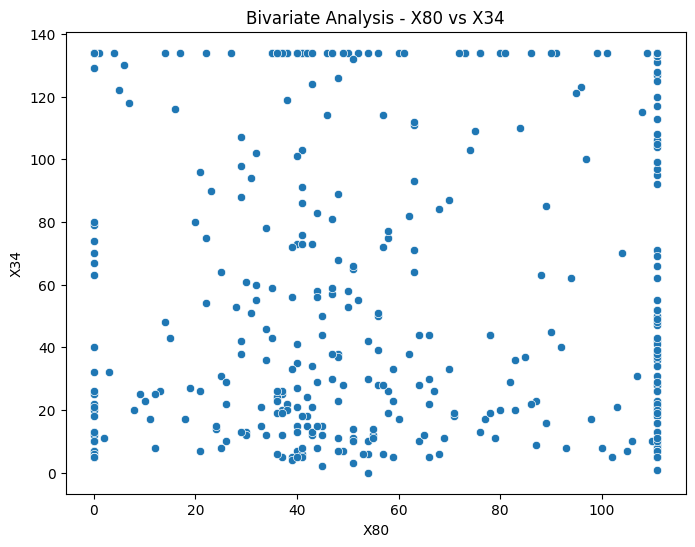

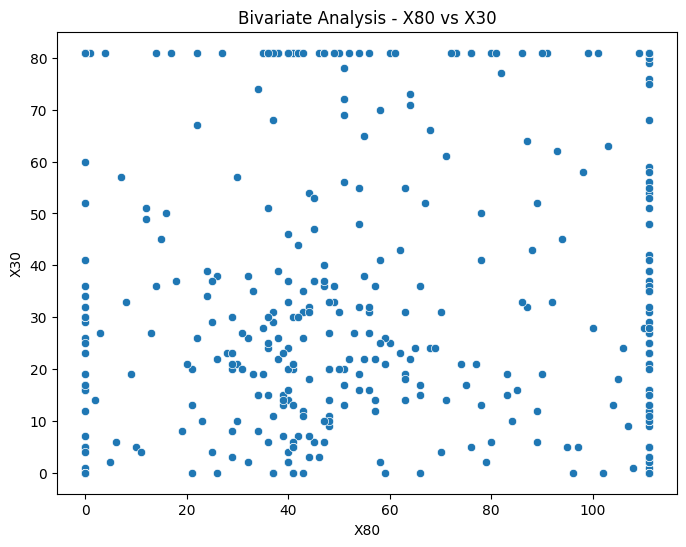

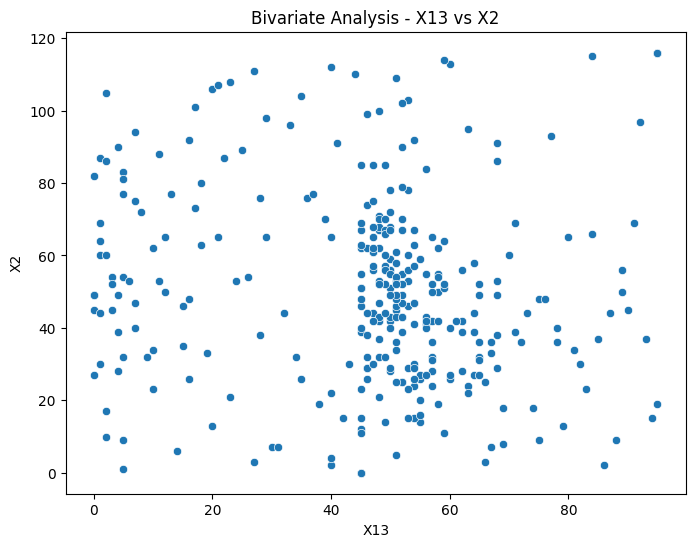

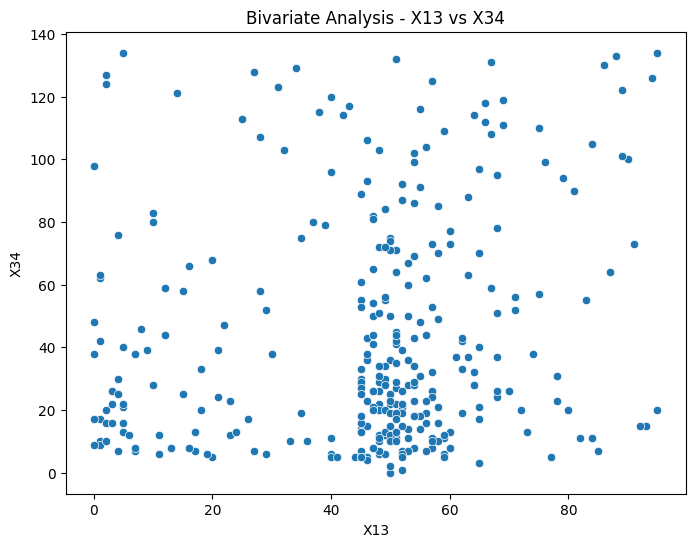

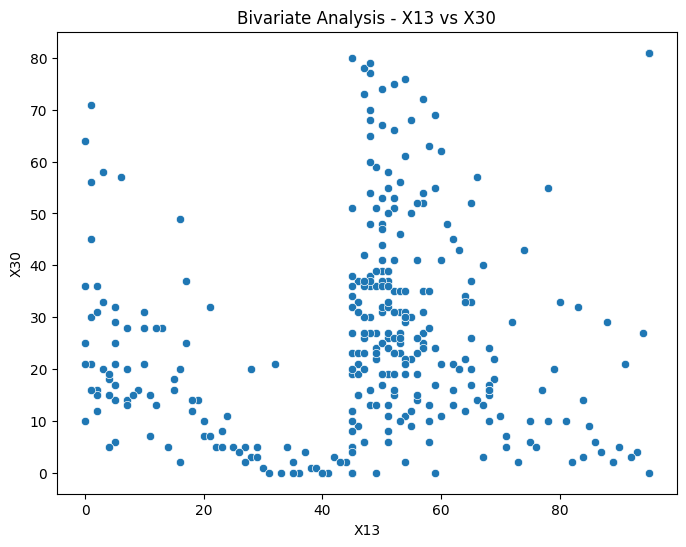

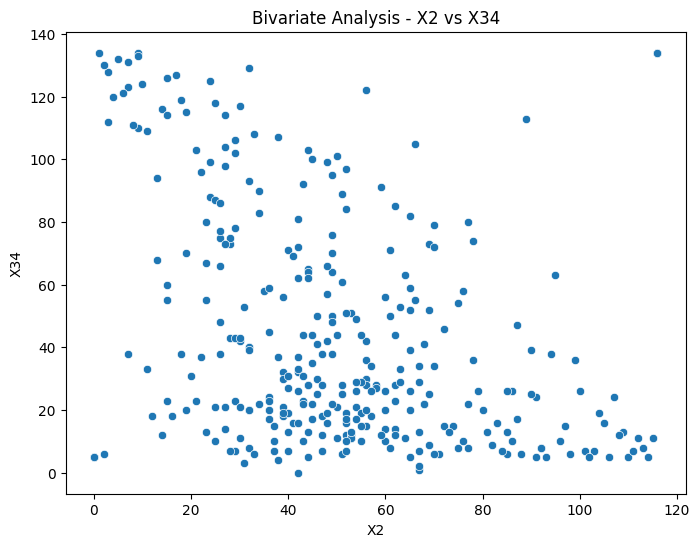

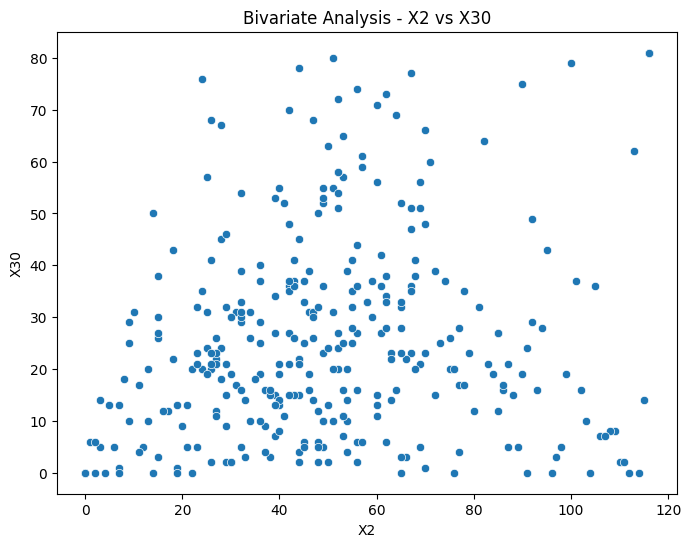

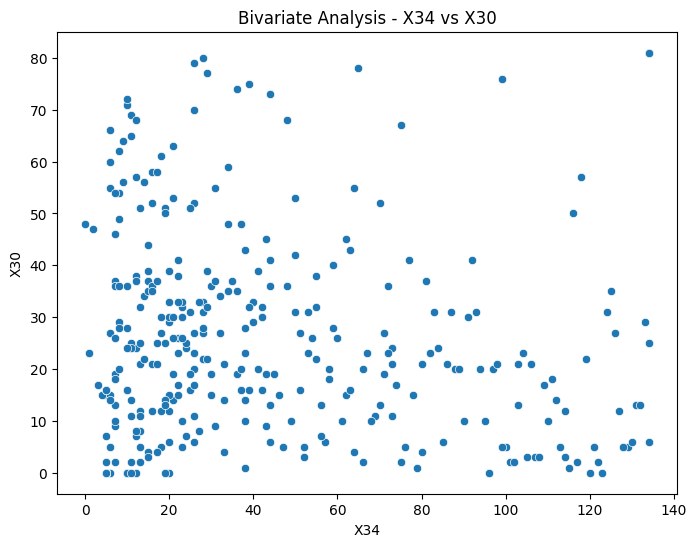

In [28]:
bivariate_analysis(df1, 5)


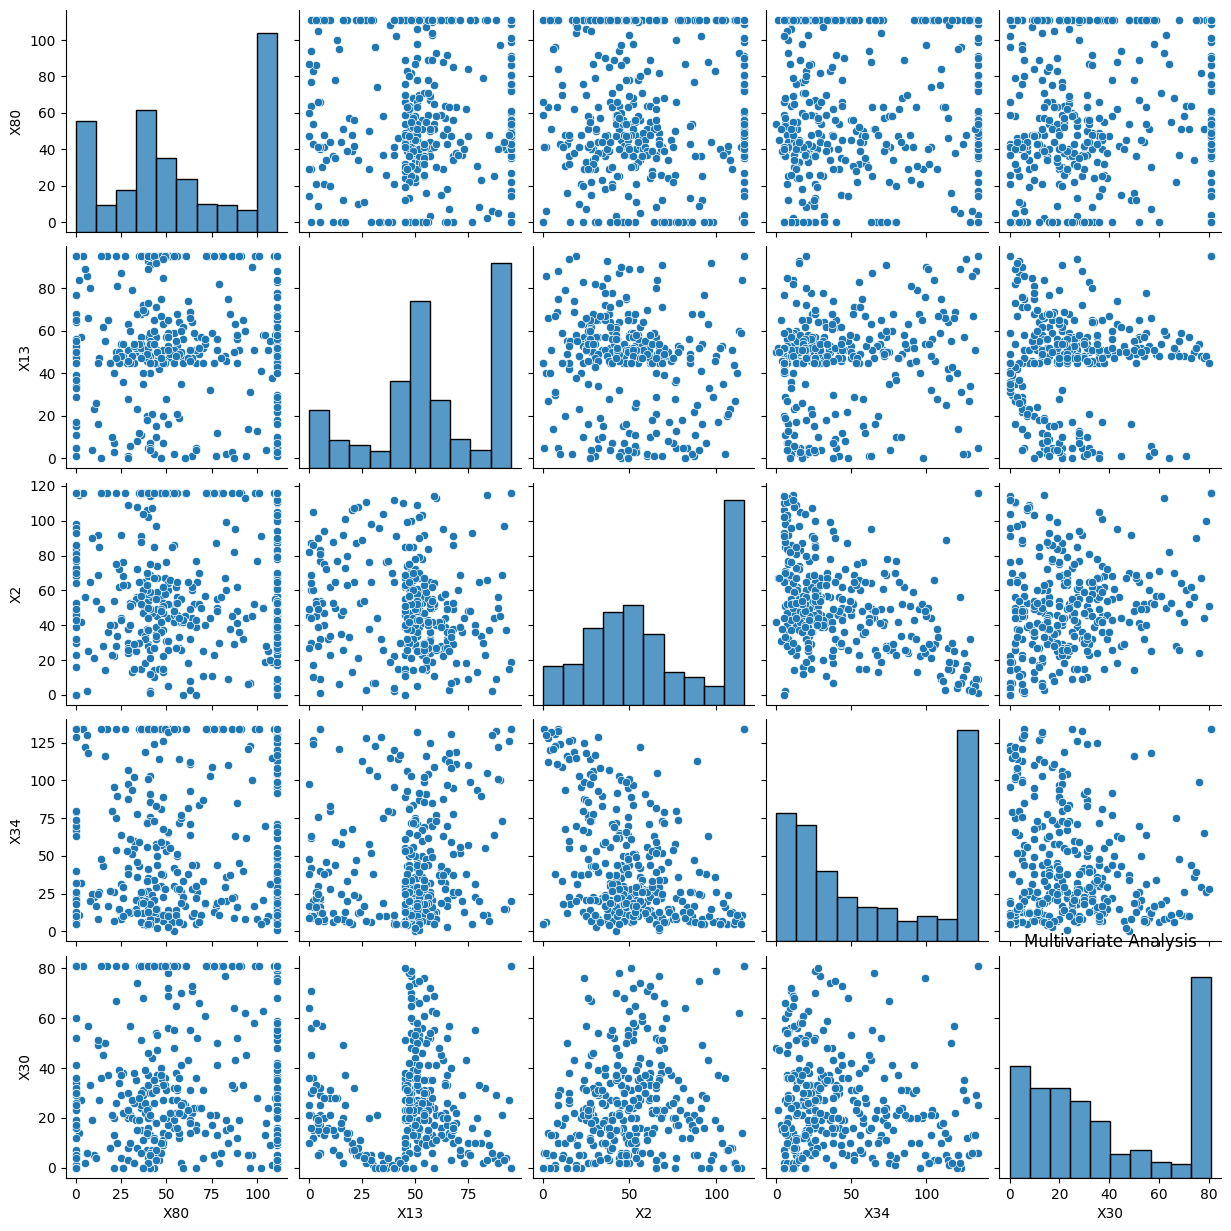

In [29]:
multivariate_analysis(df1, 5)

## MODEL GENERATIONS AND CREATIONS

In [30]:
# Split data into features (X) and target (y)
X = df1.drop(columns=['S'])
y = df1['S']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import LabelEncoder

# Step 1: Check the data type of y_test
print("Data type of y_test:", y_test.dtype)

# Step 2: Verify unique classes in y_test
unique_classes_test = np.unique(y_test)
print("Unique classes in y_test:", unique_classes_test)

# Step 3: Adjust labels if necessary
if not np.array_equal(unique_classes_test, np.arange(len(unique_classes_test))):
    print("Adjusting labels...")
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    print("Adjusted unique classes in y_test:", np.unique(y_test_encoded))
else:
    y_test_encoded = y_test
    
# Step 1: Check the data type of y_train
print("Data type of y_train:", y_train.dtype)

# Step 2: Verify unique classes in y_test
unique_classes_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_train)

# Step 3: Adjust labels if necessary
if not np.array_equal(unique_classes_train, np.arange(len(unique_classes_train))):
    print("Adjusting labels...")
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    print("Adjusted unique classes in y_train:", np.unique(y_train_encoded))
else:
    y_train_encoded = y_train



Data type of y_test: float64
Unique classes in y_test: [1. 2. 3. 4. 5. 6.]
Adjusting labels...
Adjusted unique classes in y_test: [0 1 2 3 4 5]
Data type of y_train: float64
Unique classes in y_train: [1. 2. 3. 4. 5. 6.]
Adjusting labels...
Adjusted unique classes in y_train: [0 1 2 3 4 5]


In [31]:


# Define function to create CNN model
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D((2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1],1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

# Load your dataframe and preprocess it
# Assuming df contains your preprocessed dataframe



# Machine Learning Algorithms
ml_algorithms = {
    'Boosting': {
        'AdaBoost': AdaBoostClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier()
    },
    'Other': {
        'RandomForest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }
}

# Deep Learning Algorithms
dl_algorithms = {
    'CNN': {
        'CNN_1': KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=32, verbose=0)
    },
    'LSTM': {
        'LSTM_1': KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)
    }
}

# Train and test ML algorithms
for category, algorithms in ml_algorithms.items():
    print(f"Training and testing {category} algorithms...")
    for name, model in algorithms.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train_encoded)
        print(f"Testing {name}...")
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")

# Train and test DL algorithms
for category, algorithms in dl_algorithms.items():
    print(f"Training and testing {category} algorithms...")
    for name, model in algorithms.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train_encoded)
        print(f"Testing {name}...")
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")


Training and testing Boosting algorithms...
Training AdaBoost...
Testing AdaBoost...
AdaBoost Accuracy: 0.3778
Training GradientBoosting...
Testing GradientBoosting...
GradientBoosting Accuracy: 0.4889
Training XGBoost...
Testing XGBoost...
XGBoost Accuracy: 0.5444
Training and testing Other algorithms...
Training RandomForest...
Testing RandomForest...
RandomForest Accuracy: 0.5333
Training KNN...
Testing KNN...
KNN Accuracy: 0.4000
Training and testing CNN algorithms...
Training CNN_1...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing CNN_1...
CNN_1 Accuracy: 0.4000
Training and testing LSTM algorithms...
Training LSTM_1...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Testing LSTM_1...
LSTM_1 Accuracy: 0.0444


In [32]:
np.unique (y_train)

array([1., 2., 3., 4., 5., 6.])

In [33]:
# Function to train and test ML algorithms
def train_test_ml_algorithms(X_train, y_train, X_test, y_test, ml_algorithms):
    results = []
    for category, algorithms in ml_algorithms.items():
        for name, model in algorithms.items():
            print(f"Training and testing {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results.append({'Algorithm': name, 'Category': category, 'Accuracy': accuracy})
    return results

# Function to train and test DL algorithms
def train_test_dl_algorithms(X_train, y_train, X_test, y_test, dl_algorithms):
    results = []
    for category, algorithms in dl_algorithms.items():
        for name, model in algorithms.items():
            print(f"Training and testing {name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results.append({'Algorithm': name, 'Category': category, 'Accuracy': accuracy})
    return results

# Train and test ML algorithms
ml_results = train_test_ml_algorithms(X_train, y_train_encoded, X_test, y_test_encoded, ml_algorithms)

# Train and test DL algorithms
dl_results = train_test_dl_algorithms(X_train, y_train_encoded, X_test, y_test_encoded, dl_algorithms)

# Convert results to DataFrame
ml_results_df = pd.DataFrame(ml_results)
dl_results_df = pd.DataFrame(dl_results)

# Combine ML and DL results
combined_results_df = pd.concat([ml_results_df, dl_results_df], ignore_index=True)

# Display combined results
print(combined_results_df)

Training and testing AdaBoost...
Training and testing GradientBoosting...
Training and testing XGBoost...
Training and testing RandomForest...
Training and testing KNN...
Training and testing CNN_1...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training and testing LSTM_1...


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


          Algorithm  Category  Accuracy
0          AdaBoost  Boosting  0.377778
1  GradientBoosting  Boosting  0.555556
2           XGBoost  Boosting  0.544444
3      RandomForest     Other  0.555556
4               KNN     Other  0.400000
5             CNN_1       CNN  0.233333
6            LSTM_1      LSTM  0.044444


In [34]:
combined_results_df

Algorithm  Category  Accuracy
0          AdaBoost  Boosting  0.377778
1  GradientBoosting  Boosting  0.555556
2           XGBoost  Boosting  0.544444
3      RandomForest     Other  0.555556
4               KNN     Other  0.400000
5             CNN_1       CNN  0.233333
6            LSTM_1      LSTM  0.044444

## FORMATTING DATA WITH LARGE SAMEPLE USING OVERSAMPLING:

In [37]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

In [38]:
X_resampled.shape

(1392, 84)

In [39]:
y_resampled.shape

(1392,)

In [40]:
y_resampled.unique()

array([1., 2., 3., 4., 5., 6.])

##  GA STATISTICAL MODEL

In [41]:
df1 = pd.DataFrame()
df1

Empty DataFrame
Columns: []
Index: []

In [42]:
df1 = X_resampled
df1['label'] = y_resampled
df1

Num  Country         X1          X2          X3          X4  \
0      10.000000      1.0  32.000000  116.000000  124.000000  214.000000   
1      22.000000      2.0   0.000000   54.000000    4.000000   33.000000   
2      27.000000      1.0  32.000000  116.000000  124.000000  214.000000   
3      73.000000      2.0  15.000000   62.000000   56.000000   65.000000   
4      74.000000      2.0  21.000000   92.000000   22.000000   20.000000   
...          ...      ...        ...         ...         ...         ...   
1387  370.125869      2.0   3.986015   53.337995    2.675990   43.268068   
1388  418.361592      3.0  32.000000  116.000000  124.000000  214.000000   
1389  143.650452      2.0  32.000000  116.000000  124.000000  214.000000   
1390  243.194592      2.0  15.578280   56.457004   80.290514  116.437145   
1391  208.558285      2.0   7.820289   65.000000   59.000000   72.856231   

              X5         X6          X7         X8  ...        X74        X75  \
0     136.000000  32.000000  218.000000  76.000000  ...  65.000000  95.000000   
1      79.000000   0.000000   74.000000  14.000000  ...  23.000000  27.000000   
2     136.000000  32.000000  218.000000  76.000000  ...  65.000000  95.000000   
3      90.000000  15.000000   57.000000  34.000000  ...  15.000000  24.000000   
4      78.000000  23.000000    1.000000  28.000000  ...  20.000000  76.000000   
...          ...        ...         ...        ...  ...        ...        ...   
1387   19.268068   3.986015   74.324010   8.634034  ...  51.818189  76.410266   
1388  136.000000  32.000000  218.000000  76.000000  ...   0.000000   0.000000   
1389  136.000000  32.000000  218.000000  76.000000  ...  58.891174  86.071716   
1390   47.098670  17.156560   74.568351  34.843440  ...  27.000000  43.000000   
1391   21.424924  10.748404   51.000000  30.892173  ...  38.245212  27.071885   

             X76         X77        X78         X79         X80         X81  \
0     149.000000  149.000000  98.000000  121.000000  111.000000  113.000000   
1     111.000000   44.000000  44.000000   48.000000   40.000000  105.000000   
2     149.000000  149.000000  98.000000  121.000000  111.000000  113.000000   
3       2.000000   15.000000  68.000000   28.000000   24.000000   58.000000   
4      16.000000   17.000000  41.000000   94.000000   25.000000   30.000000   
...          ...         ...        ...         ...         ...         ...   
1387  118.242441  119.932417  68.256426  113.902102   77.200484  107.592077   
1388  149.000000  149.000000  98.000000    0.000000    0.000000  113.000000   
1389  149.000000  149.000000  88.789770  109.628185  100.568005  113.000000   
1390   90.802659  101.767376  40.143883   60.495035   44.686879   68.297695   
1391  144.435331  144.363447  35.706078   14.107827   55.245212  113.000000   

             X82  label  
0     112.000000    1.0  
1     103.000000    1.0  
2     112.000000    1.0  
3      48.000000    1.0  
4      78.000000    1.0  
...          ...    ...  
1387   96.114228    6.0  
1388  112.000000    6.0  
1389  112.000000    6.0  
1390   95.552925    6.0  
1391  112.000000    6.0  

[1392 rows x 85 columns]

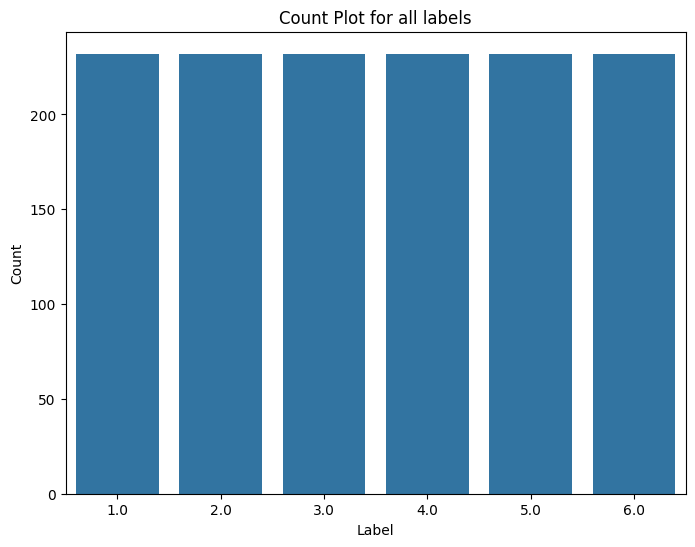

In [43]:
# Plot countplot for each label
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='label')
plt.title(f'Count Plot for all labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random



def create_ensemble(classifiers, weights):
    return VotingClassifier(classifiers, voting='soft', weights=weights)

# Fitness function
def fitness(solution, classifiers, X_train, y_train):
    weights = [s / sum(solution) for s in solution]
    ensemble = create_ensemble(classifiers, weights)
    cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
    return np.mean(cv_scores)

# Genetic Algorithm
def genetic_algorithm(population_size, num_generations, mutation_rate):
    classifiers = [
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ]
    
    population = [[random.randint(0, 1) for _ in range(3)] for _ in range(population_size)]  # Initialize random population
    for generation in range(num_generations):
        # Evaluate fitness for each solution in the population
        fitness_scores = [fitness(solution, classifiers, X_train, y_train) for solution in population]
        
        # Select top solutions based on fitness
        selected_indices = np.argsort(fitness_scores)[-int(population_size * 0.2):]
        selected_population = [population[i] for i in selected_indices]
        
        # Crossover
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.choices(selected_population, k=2)
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            new_population.append(child)
        
        # Mutation
        for i in range(len(new_population)):
            for j in range(len(new_population[i])):
                if random.random() < mutation_rate:
                    new_population[i][j] = 1 - new_population[i][j]  # Flip bit
            
        population = new_population
    
    # Select the best solution from the final population
    best_solution = max(population, key=lambda x: fitness(x, classifiers, X_train, y_train))
    return best_solution, fitness(best_solution, classifiers, X_train, y_train)

# Example usage:
X_train = X_resampled  # Training features
y_train = y_resampled  # Training labels
population_size = 1
num_generations = 1
mutation_rate = 0.1

best_solution, best_fitness = genetic_algorithm(population_size, num_generations, mutation_rate)
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)


Best solution: [0, 0, 1]
Best fitness: 0.9655295118743716


In [45]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def create_ensemble(classifiers, weights):
    return VotingClassifier(classifiers, voting='soft', weights=weights)

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)
    return train_metrics, test_metrics

def fitness(solution, classifiers, X_train, y_train):
    weights = [s / sum(solution) for s in solution]
    ensemble = create_ensemble(classifiers, weights)
    cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
    return np.mean(cv_scores)

def genetic_algorithm(population_size, num_generations, mutation_rate, X_train, X_test, y_train, y_test):
    classifiers = [
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ]
    
    population = [[random.randint(0, 1) for _ in range(3)] for _ in range(population_size)]  # Initialize random population
    for generation in range(num_generations):
        # Evaluate fitness for each solution in the population
        fitness_scores = [fitness(solution, classifiers, X_train, y_train) for solution in population]
        
        # Select top solutions based on fitness
        selected_indices = np.argsort(fitness_scores)[-int(population_size * 0.2):]
        selected_population = [population[i] for i in selected_indices]
        
        # Crossover
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.choices(selected_population, k=2)
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            new_population.append(child)
        
        # Mutation
        for i in range(len(new_population)):
            for j in range(len(new_population[i])):
                if random.random() < mutation_rate:
                    new_population[i][j] = 1 - new_population[i][j]  # Flip bit
            
        population = new_population
    
    # Select the best solution from the final population
    best_solution = max(population, key=lambda x: fitness(x, classifiers, X_train, y_train))
    best_weights = [s / sum(best_solution) for s in best_solution]
    ensemble = create_ensemble(classifiers, best_weights)
    train_metrics, test_metrics = evaluate_classifier(ensemble, X_train, X_test, y_train, y_test)
    return best_solution, train_metrics, test_metrics

# Example usage:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
population_size = 1
num_generations = 1
mutation_rate = 0.1

best_solution, train_metrics, test_metrics = genetic_algorithm(population_size, num_generations, mutation_rate, X_train, X_test, y_train, y_test)
print("Best solution:", best_solution)
print("Train metrics:", train_metrics)
print("Test metrics:", test_metrics)

Best solution: [1, 0, 0]
Train metrics: (1.0, 1.0, 1.0, 1.0)
Test metrics: (1.0, 1.0, 1.0, 1.0)


In [46]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
population_size = 1
num_generations = 1
mutation_rate = 0.1

best_solution, train_metrics, test_metrics = genetic_algorithm(population_size, num_generations, mutation_rate, X_train, X_test, y_train, y_test)

# Create DataFrame
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-score', 'Recall', 'Precision'],
    'Train': train_metrics,
    'Test': test_metrics
})

# Add Best Solution row
best_solution_row = pd.DataFrame({
    'Metric': ['Best Solution'],
    'Train': [best_solution],
    'Test': ['']
})
results_df = pd.concat([results_df, best_solution_row], ignore_index=True)

print(results_df)


          Metric      Train      Test
0       Accuracy        1.0  0.985663
1       F1-score        1.0  0.985745
2         Recall        1.0  0.985663
3      Precision        1.0  0.985665
4  Best Solution  [0, 0, 1]          


# PSO

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def create_ensemble(classifiers, weights):
    return VotingClassifier(classifiers, voting='soft', weights=weights)

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_pred_train)
    test_metrics = calculate_metrics(y_test, y_pred_test)
    return train_metrics, test_metrics

def fitness(position, classifiers, X_train, y_train):
    weights = position / np.sum(position)
    ensemble = create_ensemble(classifiers, weights)
    cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
    return np.mean(cv_scores)

def update_velocity(particle_position, particle_velocity, personal_best_position, global_best_position, w, c1, c2):
    r1 = np.random.rand(len(particle_position))
    r2 = np.random.rand(len(particle_position))
    inertia = w * particle_velocity
    cognitive_component = c1 * r1 * (personal_best_position - particle_position)
    social_component = c2 * r2 * (global_best_position - particle_position)
    new_velocity = inertia + cognitive_component + social_component
    return new_velocity

def update_position(particle_position, particle_velocity):
    new_position = particle_position + particle_velocity
    return new_position

def pso(X_train, X_test, y_train, y_test, n_particles, max_iter, w, c1, c2):
    classifiers = [
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ]
    
    dim = len(classifiers)
    population = np.random.rand(n_particles, dim)  # Initialize random population
    velocity = np.random.rand(n_particles, dim)  # Initialize random velocity
    personal_best_position = population.copy()
    personal_best_score = np.zeros(n_particles)
    global_best_position = None
    global_best_score = float('-inf')
    
    for _ in range(max_iter):
        for i in range(n_particles):
            score = fitness(population[i], classifiers, X_train, y_train)
            if score > personal_best_score[i]:
                personal_best_score[i] = score
                personal_best_position[i] = population[i].copy()
            if score > global_best_score:
                global_best_score = score
                global_best_position = population[i].copy()
        
        for i in range(n_particles):
            velocity[i] = update_velocity(population[i], velocity[i], personal_best_position[i], global_best_position, w, c1, c2)
            population[i] = update_position(population[i], velocity[i])
    
    best_weights = global_best_position / np.sum(global_best_position)
    ensemble = create_ensemble(classifiers, best_weights)
    train_metrics, test_metrics = evaluate_classifier(ensemble, X_train, X_test, y_train, y_test)
    return best_weights, train_metrics, test_metrics

# Example usage:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
n_particles = 1
max_iter = 1
w = 0.5
c1 = 1.5
c2 = 1.5

best_weights, train_metrics, test_metrics = pso(X_train, X_test, y_train, y_test, n_particles, max_iter, w, c1, c2)
print("Best solution (weights):", best_weights)
print("Train metrics:", train_metrics)
print("Test metrics:", test_metrics)


Best solution (weights): [0.49943337 0.47073812 0.02982851]
Train metrics: (1.0, 1.0, 1.0, 1.0)
Test metrics: (1.0, 1.0, 1.0, 1.0)


In [48]:
y_test

1029    5.0
168     3.0
1374    6.0
988     4.0
453     1.0
       ... 
155     3.0
310     3.0
1302    6.0
1198    5.0
701     2.0
Name: S, Length: 279, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
population_size = 1
num_generations = 1
mutation_rate = 0.1

best_solution, train_metrics, test_metrics = pso(X_train, X_test, y_train, y_test, n_particles, max_iter, w, c1, c2)

# Create DataFrame
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-score', 'Recall', 'Precision'],
    'Train': train_metrics,
    'Test': test_metrics
})

# Add Best Solution row
best_solution_row = pd.DataFrame({
    'Metric': ['Best Solution'],
    'Train': [best_solution],
    'Test': ['']
})
results_df = pd.concat([results_df, best_solution_row], ignore_index=True)

print(results_df)

          Metric                                              Train Test
0       Accuracy                                                1.0  1.0
1       F1-score                                                1.0  1.0
2         Recall                                                1.0  1.0
3      Precision                                                1.0  1.0
4  Best Solution  [0.4554586357347048, 0.2939133658084454, 0.250...     


In [50]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.metrics import make_scorer

from tensorflow.keras import layers, models


In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your resampled data
#X_resampled = ...  # Load your resampled features
#y_resampled = ...  # Load your resampled labels

# Apply label encoding to convert categorical labels to numerical values
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=6, activation='softmax')  # 7 units for 7 labels (0-6)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2731 - loss: 1.7203 - val_accuracy: 0.3692 - val_loss: 1.5510
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5238 - loss: 1.4131 - val_accuracy: 0.5699 - val_loss: 1.3294
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 1.1672 - val_accuracy: 0.6452 - val_loss: 1.1106
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7332 - loss: 0.9434 - val_accuracy: 0.7025 - val_loss: 0.9310
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7889 - loss: 0.7583 - val_accuracy: 0.7599 - val_loss: 0.7746
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8464 - loss: 0.6110 - val_accuracy: 0.7814 - val_loss: 0.6460
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8634 - loss: 0.5059 - val_accuracy: 0.8208 - val_loss: 0.5673
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8886 - loss: 0.4187 - val_accuracy: 0.8566 - v

In [52]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Calculate the average values
avg_train_loss = sum(train_loss) / len(train_loss)
avg_val_loss = sum(val_loss) / len(val_loss)
avg_train_accuracy = sum(train_accuracy) / len(train_accuracy)
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'],
    'Average Value': [avg_train_loss, avg_val_loss, avg_train_accuracy, avg_val_accuracy]
})

print(results_df)

                Metric  Average Value
0           Train Loss       0.103414
1      Validation Loss       0.144325
2       Train Accuracy       0.971653
3  Validation Accuracy       0.950538


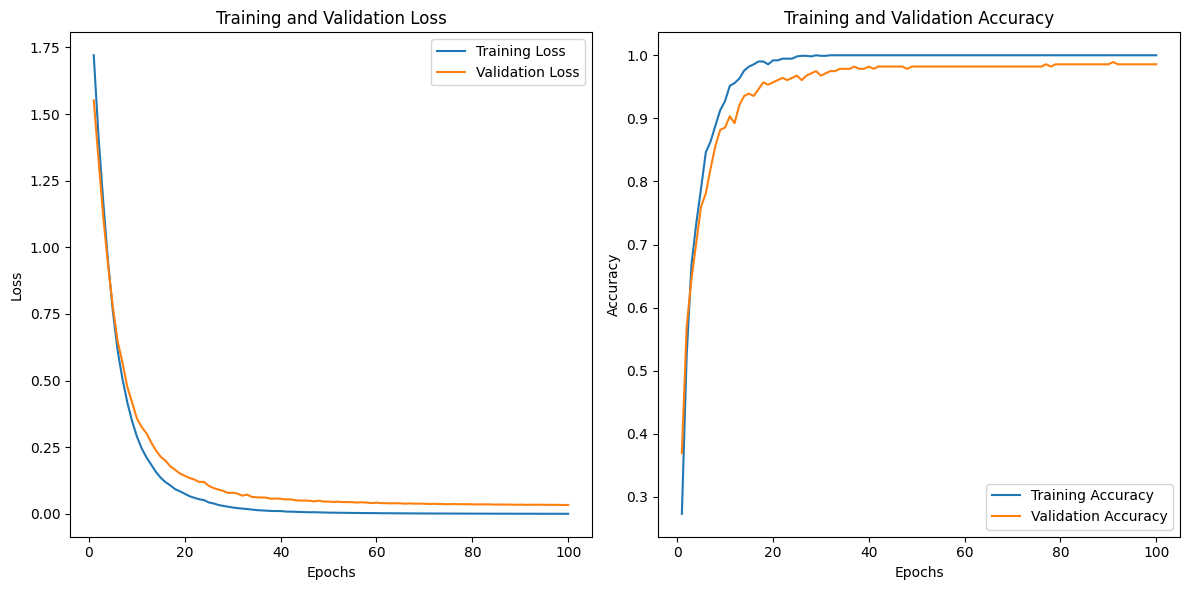

In [53]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
import lime
import lime.lime_tabular

In [57]:
feature_names = X.columns

feature_names

Index(['Num', 'Country', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69',
       'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79',
       'X80', 'X81', 'X82'],
      dtype='object')

In [59]:
import shap

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
# Define LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, class_names=['0', '1','2','3','4','5'])

import scipy as sp

In [66]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, class_names=['0', '1','2','3','4','5'])

sample_idx = 0
sample = X_test_scaled[0]

# Convert the predicted labels to a format suitable for LIME
predict_fn = lambda x: model.predict(x)

# Predict function with argmax to get class labels
#predict_fn_with_argmax = lambda x: np.argmax(predict_fn(x), axis=1)

# Explain the prediction
explanation = explainer.explain_instance(sample, predict_fn, labels=(0, 1, 2, 3, 4, 5))

# Show explanation inline in VS Code / Jupyter
from IPython.display import display, HTML
display(HTML(explanation.as_html()))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [68]:
#predict_fn = lambda x: model.predict(x)

sample_idx = 0
sample = X_test_scaled[0:100]

# Convert the predicted labels to a format suitable for LIME
predict_fn = lambda x: model.predict(x)

kpred =predict_fn(sample)
kpred= np.argmax(kpred, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [69]:
y_test

array([4, 2, 5, 3, 0, 4, 5, 0, 2, 4, 4, 4, 0, 2, 1, 0, 1, 2, 2, 3, 5, 1,
       4, 2, 0, 0, 3, 5, 1, 0, 0, 4, 1, 0, 3, 3, 2, 0, 1, 3, 1, 1, 5, 3,
       0, 5, 0, 2, 3, 3, 5, 0, 1, 2, 1, 5, 3, 3, 3, 4, 1, 0, 1, 1, 1, 0,
       1, 5, 0, 0, 0, 0, 1, 2, 4, 1, 1, 1, 1, 3, 5, 3, 1, 5, 1, 0, 5, 5,
       5, 2, 3, 1, 0, 1, 2, 5, 3, 5, 0, 4, 4, 1, 2, 2, 1, 0, 1, 2, 5, 4,
       4, 0, 4, 1, 2, 1, 2, 3, 5, 0, 2, 3, 4, 1, 5, 4, 3, 3, 2, 2, 1, 5,
       3, 5, 0, 5, 3, 4, 3, 4, 5, 5, 4, 5, 5, 1, 0, 5, 5, 3, 3, 4, 0, 5,
       4, 4, 1, 5, 2, 0, 1, 2, 4, 1, 3, 0, 2, 3, 4, 5, 5, 1, 3, 0, 2, 3,
       2, 4, 1, 2, 4, 2, 3, 2, 4, 1, 4, 5, 5, 3, 3, 2, 4, 0, 3, 0, 4, 0,
       0, 5, 3, 2, 5, 3, 3, 5, 3, 5, 0, 4, 3, 0, 1, 4, 4, 1, 3, 1, 1, 2,
       4, 5, 3, 3, 0, 2, 2, 5, 2, 5, 5, 2, 3, 4, 3, 5, 0, 2, 3, 0, 2, 5,
       4, 5, 4, 2, 2, 0, 1, 4, 1, 1, 2, 3, 5, 3, 4, 3, 4, 4, 1, 2, 3, 1,
       1, 5, 3, 2, 2, 0, 4, 3, 0, 1, 2, 2, 5, 4, 1])

In [70]:
accuracy_score(y_test[0:100],kpred)

0.99